In [88]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import time
import random

In [7]:
import seaborn as sns

In [30]:
pip install pearsonr

Note: you may need to restart the kernel to use updated packages.


# Dakota Wernimont and Ahmed Abbas Group Project

# Open link and go through every year while displaying link for each one

In [18]:
#Define year that we want to start
year = 2010

#Import URL and open the browser
url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"
browser = webdriver.Chrome()
browser.maximize_window()

page_counter = 1

#Create loop to go through each year until we reach the most recent
while year < 2024:  
    print(year)
    
    url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"
    print(url)
    browser.get(url)
    
    #Random wait time to not seem like a bot
    time.sleep(random.uniform(1,4))

    #Count number of pages we go through
    page_counter += 1

    #Add a year for every year we go through
    year += 1

2010
https://www.nfl.com/stats/team-stats/offense/passing/2010/reg/all
2011
https://www.nfl.com/stats/team-stats/offense/passing/2011/reg/all
2012
https://www.nfl.com/stats/team-stats/offense/passing/2012/reg/all
2013
https://www.nfl.com/stats/team-stats/offense/passing/2013/reg/all
2014
https://www.nfl.com/stats/team-stats/offense/passing/2014/reg/all
2015
https://www.nfl.com/stats/team-stats/offense/passing/2015/reg/all
2016
https://www.nfl.com/stats/team-stats/offense/passing/2016/reg/all
2017
https://www.nfl.com/stats/team-stats/offense/passing/2017/reg/all
2018
https://www.nfl.com/stats/team-stats/offense/passing/2018/reg/all
2019
https://www.nfl.com/stats/team-stats/offense/passing/2019/reg/all
2020
https://www.nfl.com/stats/team-stats/offense/passing/2020/reg/all
2021
https://www.nfl.com/stats/team-stats/offense/passing/2021/reg/all
2022
https://www.nfl.com/stats/team-stats/offense/passing/2022/reg/all
2023
https://www.nfl.com/stats/team-stats/offense/passing/2023/reg/all


# Scrape Data from the website and create a dataframe

In [6]:
#Open Browser to start scraping data
browser = webdriver.Chrome()
browser.maximize_window()

#Create a set of years we want to go through
start_year = 2010
end_year = 2024

#Somewhere to store data
all_data = []


#Create loop to keep going through every year
for year in range(start_year, end_year):
    
    url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"
    browser.get(url)

    #Wait to ensure all data is loaded before start scraping
    table = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "table"))
    )
        
    rows = table.find_elements(By.TAG_NAME, "tr")

    for row in rows[1:]:  
        cols = row.find_elements(By.TAG_NAME, "td")
        row_data = [col.text for col in cols]
        row_data.insert(0, year)
        all_data.append(row_data)
    
time.sleep(random.uniform(1, 4))

df = pd.DataFrame(all_data, columns=headers)
df.to_csv = ('Team_Stats.csv')
print("Data scraping completed.")

NameError: name 'webdriver' is not defined

In [10]:
#Open df so we don't have to scrape again
df = pd.read_csv('nfl_passing_stats.csv')

#Keep Team Names consistent
df['Team'] = df['Team'].replace(['Team', 'Redskins','Football Team'], 'Commanders')
df['Team'] = df['Team'].replace(['Niners'], '49ers')

df

,Year,Team,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2010,Bears,466,276,59.2,7.3,3397,23,21,79.5,163,35.0,42,6,89T,56,382
1,2010,Bengals,590,365,61.9,6.8,3988,26,20,82.4,206,34.9,45,9,78T,28,221
2,2010,Bills,519,296,57.0,6.5,3371,24,21,75.2,166,32.0,42,8,65,34,213
3,2010,Broncos,580,334,57.6,7.4,4307,25,12,86.8,204,35.2,62,13,71,40,269
4,2010,Browns,478,296,61.9,6.7,3203,13,18,75.0,154,32.2,42,6,65,36,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Seahawks,575,371,64.5,7.2,4167,23,12,90.7,189,32.9,56,6,73T,38,257
444,2023,Steelers,506,323,63.8,6.8,3421,13,9,84.6,153,30.2,41,9,86,36,258
445,2023,Texans,592,372,62.8,7.7,4578,27,8,96.2,215,36.3,69,10,75,47,405
446,2023,Titans,494,304,61.5,7.1,3512,14,11,83.2,158,32.0,54,10,70,64,445


# Import other DF and Integrate horizontally

In [13]:
#Read other dataframe from kaggle
df_wins = pd.read_csv('team_stats_2010_2023.csv')

#Remove team locations to match the df above
df_wins['team'] = df_wins['team'].str.split().str[-1]

#Uppercase year and team to match above
df_wins.columns= df_wins.columns.str.capitalize()

#Keep Team names consistent
df_wins['Team'] = df_wins['Team'].replace(['Team', 'Redskins','Football Team'], 'Commanders')
df['Team'] = df['Team'].replace(['Niners'], '49ers')

df_wins

,Year,Team,Wins,Losses,Win_loss_perc,Points,Points_opp,Points_diff,G,Plays_offense,Yds_per_play_offense,Turnovers,Fumbles_lost,Penalties,Penalties_yds,Pen_fd,Score_pct,Turnover_pct
0,2010,Patriots,14,2,0.875,518,313,205,16,986,5.9,10,5,83,766,20,47.0,11.3
1,2010,Jets,11,5,0.688,367,304,63,16,1087,5.2,21,7,103,934,18,32.2,17.2
2,2010,Dolphins,7,9,0.438,273,333,-60,16,1040,5.0,31,10,72,595,20,29.7,17.6
3,2010,Bills,4,12,0.250,283,425,-142,16,954,5.1,39,18,82,633,15,25.3,11.8
4,2010,Steelers,12,4,0.750,375,232,143,16,993,5.6,18,9,100,903,14,36.9,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Panthers,2,15,0.118,236,416,-180,17,1096,4.1,20,10,103,845,36,25.0,14.0
444,2023,49ers,12,5,0.706,491,298,193,17,1024,6.6,18,6,101,933,29,45.3,9.7
445,2023,Rams,10,7,0.588,404,377,27,17,1094,5.6,18,5,89,720,35,41.1,14.2
446,2023,Seahawks,9,8,0.529,364,402,-38,17,995,5.5,17,5,111,954,35,38.8,14.5


In [15]:
merged_df = pd.merge(df, df_wins, on = ['Year', 'Team'], how = 'inner')

In [17]:
merged_df

,Year,Team,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,...,G,Plays_offense,Yds_per_play_offense,Turnovers,Fumbles_lost,Penalties,Penalties_yds,Pen_fd,Score_pct,Turnover_pct
0,2010,Bears,466,276,59.2,7.3,3397,23,21,79.5,...,16,936,4.9,31,10,91,768,24,29.3,15.6
1,2010,Bengals,590,365,61.9,6.8,3988,26,20,82.4,...,16,1046,5.1,34,14,90,725,26,30.5,17.2
2,2010,Bills,519,296,57.0,6.5,3371,24,21,75.2,...,16,954,5.1,39,18,82,633,15,25.3,11.8
3,2010,Broncos,580,334,57.6,7.4,4307,25,12,86.8,...,16,1018,5.5,27,15,98,944,24,30.6,15.7
4,2010,Browns,478,296,61.9,6.7,3203,13,18,75.0,...,16,927,5.0,29,11,78,675,24,27.7,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Seahawks,575,371,64.5,7.2,4167,23,12,90.7,...,17,995,5.5,17,5,111,954,35,38.8,14.5
444,2023,Steelers,506,323,63.8,6.8,3421,13,9,84.6,...,17,1029,5.0,16,7,86,753,19,29.9,8.5
445,2023,Texans,592,372,62.8,7.7,4578,27,8,96.2,...,17,1083,5.4,14,6,114,937,30,37.2,11.4
446,2023,Titans,494,304,61.5,7.1,3512,14,11,83.2,...,17,1002,4.9,20,9,110,882,37,32.6,13.6


# Eliminating Unwanted Rows from Final Df

In [20]:
final_df = merged_df

In [22]:
#Insert new column for TD to INT ratio
final_df['TD_to_Turnover_Rate'] = final_df['TD'] / final_df['Turnovers']
final_df['TD_to_Turnover_Rate'] = final_df['TD_to_Turnover_Rate'].round(2)

#Insert sacks per game
final_df['Sacks_taken_per_game'] = final_df['Sck'] / final_df['G']
final_df['Sacks_taken_per_game'] = final_df['Sacks_taken_per_game'].round(2)

#Turnovers and Penalties per game
final_df['Penalties_per_game'] = final_df['Penalties'] / final_df['G']
final_df['Penalties_per_game'] = final_df['Penalties_per_game'].round(2)
final_df['Turnovers_per_game'] = final_df['Turnovers'] / final_df['G']
final_df['Turnovers_per_game'] = final_df['Turnovers_per_game'].round(2)
final_df['Big_plays_per_game'] = (final_df['20+'] + final_df['40+']) / final_df['G']
final_df['Big_plays_per_game'] = final_df['Big_plays_per_game'].round(2)


#Drop unwanted columns
final_df = merged_df.drop(columns = ['TD', '20+', '40+', 'Turnovers', 'Penalties', 'Pen_fd','INT','Att','Sck','Cmp', 'Wins', '1st', 'Losses', 'G', 'SckY', 'Lng', 'Pass Yds', 'Points', 'Points_opp', 'Fumbles_lost', 'Penalties_yds', 'Plays_offense', 'Turnover_pct', '1st%', 'Yds/Att','Cmp %'])

final_df

,Year,Team,Rate,Win_loss_perc,Points_diff,Yds_per_play_offense,Score_pct,TD_to_Turnover_Rate,Sacks_taken_per_game,Penalties_per_game,Turnovers_per_game,Big_plays_per_game
0,2010,Bears,79.5,0.688,48,4.9,29.3,0.74,3.50,5.69,1.94,3.00
1,2010,Bengals,82.4,0.250,-73,5.1,30.5,0.76,1.75,5.62,2.12,3.38
2,2010,Bills,75.2,0.250,-142,5.1,25.3,0.62,2.12,5.12,2.44,3.12
3,2010,Broncos,86.8,0.250,-127,5.5,30.6,0.93,2.50,6.12,1.69,4.69
4,2010,Browns,75.0,0.313,-61,5.0,27.7,0.45,2.25,4.88,1.81,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Seahawks,90.7,0.529,-38,5.5,38.8,1.35,2.24,6.53,1.00,3.65
444,2023,Steelers,84.6,0.588,-20,5.0,29.9,0.81,2.12,5.06,0.94,2.94
445,2023,Texans,96.2,0.588,24,5.4,37.2,1.93,2.76,6.71,0.82,4.65
446,2023,Titans,83.2,0.353,-62,4.9,32.6,0.70,3.76,6.47,1.18,3.76


In [24]:
final_df

,Year,Team,Rate,Win_loss_perc,Points_diff,Yds_per_play_offense,Score_pct,TD_to_Turnover_Rate,Sacks_taken_per_game,Penalties_per_game,Turnovers_per_game,Big_plays_per_game
0,2010,Bears,79.5,0.688,48,4.9,29.3,0.74,3.50,5.69,1.94,3.00
1,2010,Bengals,82.4,0.250,-73,5.1,30.5,0.76,1.75,5.62,2.12,3.38
2,2010,Bills,75.2,0.250,-142,5.1,25.3,0.62,2.12,5.12,2.44,3.12
3,2010,Broncos,86.8,0.250,-127,5.5,30.6,0.93,2.50,6.12,1.69,4.69
4,2010,Browns,75.0,0.313,-61,5.0,27.7,0.45,2.25,4.88,1.81,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
443,2023,Seahawks,90.7,0.529,-38,5.5,38.8,1.35,2.24,6.53,1.00,3.65
444,2023,Steelers,84.6,0.588,-20,5.0,29.9,0.81,2.12,5.06,0.94,2.94
445,2023,Texans,96.2,0.588,24,5.4,37.2,1.93,2.76,6.71,0.82,4.65
446,2023,Titans,83.2,0.353,-62,4.9,32.6,0.70,3.76,6.47,1.18,3.76


# Group Check In

## Question 1 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [30]:
target = 'Win_loss_perc'
alpha = 0.05

skip_cols = ['Year',target]

results = []

for col in final_df.columns:
    if col not in skip_cols and pd.api.types.is_numeric_dtype(final_df[col]):
            corr, p_value = pearsonr(final_df[col], final_df[target])
            results.append({
                'Variable': col,
                'Correlation': round(corr, 3),
                'P-Value': round(p_value, 4),
                'Significant?': 'Yes' if p_value < alpha else 'No'
            })

correlation_df = pd.DataFrame(results)

correlation_df

,Variable,Correlation,P-Value,Significant?
0,Rate,0.653,0.0000,Yes
1,Points_diff,0.907,0.0000,Yes
2,Yds_per_play_offense,0.523,0.0000,Yes
3,Score_pct,0.688,0.0000,Yes
4,TD_to_Turnover_Rate,0.628,0.0000,Yes
5,Sacks_taken_per_game,-0.457,0.0000,Yes
6,Penalties_per_game,-0.080,0.0894,No
7,Turnovers_per_game,-0.506,0.0000,Yes
8,Big_plays_per_game,0.342,0.0000,Yes


In [32]:
target = 'Win_loss_perc'
exclude = ['Year', 'Team', 'Penalties_per_game', target]

X = final_df.drop(columns=exclude)
y = final_df[target]

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

equation = f"{target} = {intercept:.3f}"
for feature, coef in zip(X.columns, coefficients):
    sign = '+' if coef >= 0 else '-'
    equation += f" {sign} {abs(coef):.3f} × {feature}"

print("Multiple Linear Regression Equation:")
print(equation)

Multiple Linear Regression Equation:
Win_loss_perc = 0.642 + 0.001 × Rate + 0.002 × Points_diff - 0.026 × Yds_per_play_offense - 0.001 × Score_pct + 0.019 × TD_to_Turnover_Rate - 0.014 × Sacks_taken_per_game - 0.012 × Turnovers_per_game - 0.005 × Big_plays_per_game


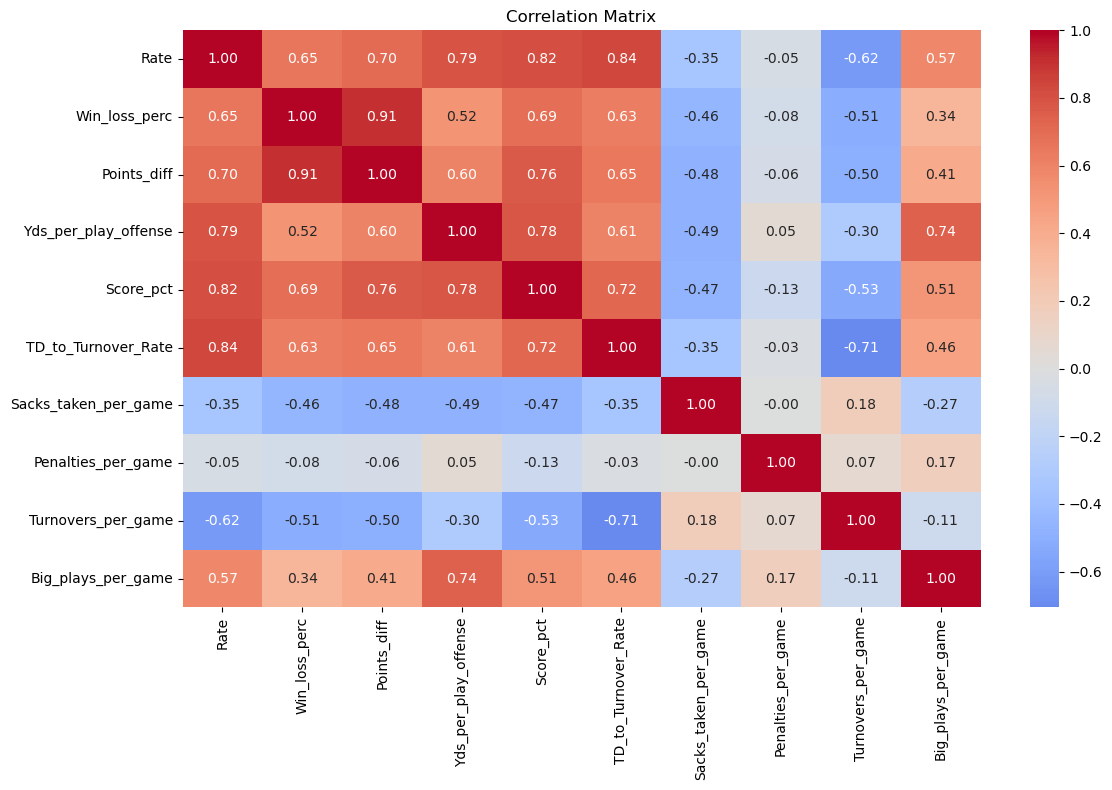

In [34]:
numeric_df = final_df.drop(columns=['Year', 'Team']) 

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# We are going to drop rate as it seems like it has very high correlation

In [36]:
target = 'Win_loss_perc'
exclude = ['Year', 'Team', 'Rate', 'Penalties_per_game', target]

X = final_df.drop(columns=exclude)
y = final_df[target]

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

equation = f"{target} = {intercept:.3f}"
for feature, coef in zip(X.columns, coefficients):
    sign = '+' if coef >= 0 else '-'
    equation += f" {sign} {abs(coef):.3f} × {feature}"

print("Multiple Linear Regression Equation:")
print(equation)

Multiple Linear Regression Equation:
Win_loss_perc = 0.662 + 0.002 × Points_diff - 0.017 × Yds_per_play_offense - 0.001 × Score_pct + 0.026 × TD_to_Turnover_Rate - 0.012 × Sacks_taken_per_game - 0.016 × Turnovers_per_game - 0.005 × Big_plays_per_game


In [39]:
target = 'Win_loss_perc'
alpha = 0.05

skip_cols = ['Year', 'Rate','Penalties_per_game', target]

results = []

for col in final_df.columns:
    if col not in skip_cols and pd.api.types.is_numeric_dtype(final_df[col]):
            corr, p_value = pearsonr(final_df[col], final_df[target])
            results.append({
                'Variable': col,
                'Correlation': round(corr, 3),
                'P-Value': round(p_value, 4),
                'Significant?': 'Yes' if p_value < alpha else 'No'
            })

correlation_df = pd.DataFrame(results)

correlation_df

,Variable,Correlation,P-Value,Significant?
0,Points_diff,0.907,0.0,Yes
1,Yds_per_play_offense,0.523,0.0,Yes
2,Score_pct,0.688,0.0,Yes
3,TD_to_Turnover_Rate,0.628,0.0,Yes
4,Sacks_taken_per_game,-0.457,0.0,Yes
5,Turnovers_per_game,-0.506,0.0,Yes
6,Big_plays_per_game,0.342,0.0,Yes


In [41]:
cleaned_finaldf = final_df.drop(columns=['Rate', 'Penalties_per_game'])
cleaned_finaldf.describe()

,Year,Win_loss_perc,Points_diff,Yds_per_play_offense,Score_pct,TD_to_Turnover_Rate,Sacks_taken_per_game,Turnovers_per_game,Big_plays_per_game
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,2016.500000,0.500252,0.000000,5.419643,35.289062,1.179263,2.358594,1.435312,3.669643
std,4.035635,0.189040,99.348189,0.482321,6.595768,0.602192,0.640414,0.386983,0.773141
min,2010.000000,0.000000,-214.000000,4.100000,18.900000,0.220000,0.880000,0.500000,1.940000
25%,2013.000000,0.375000,-72.000000,5.100000,30.500000,0.770000,1.880000,1.120000,3.120000
50%,2016.500000,0.500000,-4.000000,5.400000,35.000000,1.040000,2.310000,1.380000,3.620000
75%,2020.000000,0.625000,72.250000,5.800000,39.700000,1.440000,2.760000,1.690000,4.180000
max,2023.000000,0.938000,249.000000,6.800000,52.600000,4.500000,5.000000,2.750000,6.120000


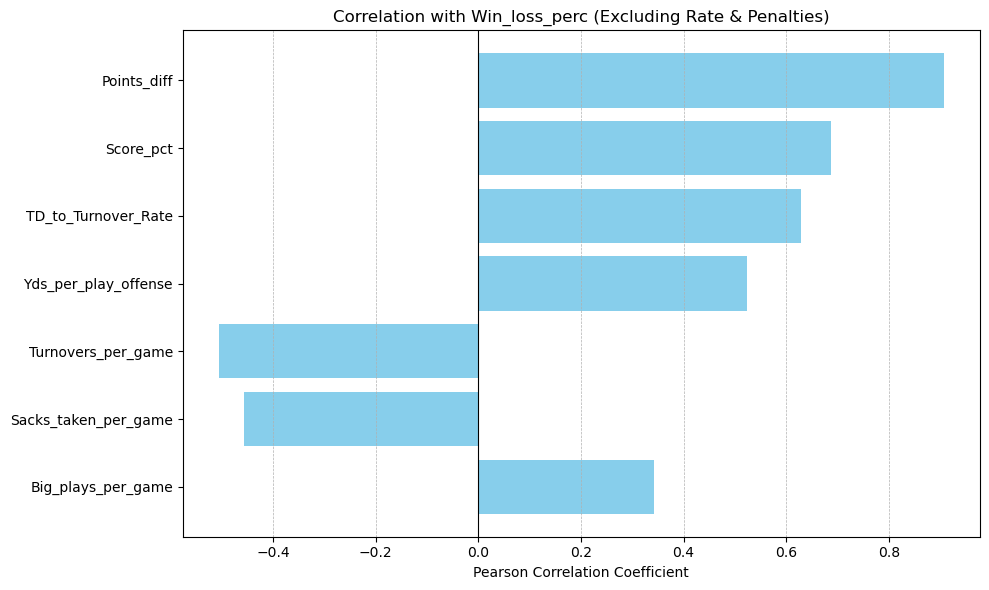

In [43]:
filtered_df = correlation_df[~correlation_df['Variable'].isin(['Rate', 'Penalties_per_game'])]

sorted_df = filtered_df.sort_values(by='Correlation', key=abs, ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(sorted_df['Variable'], sorted_df['Correlation'], color='skyblue')
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Correlation with Win_loss_perc (Excluding Rate & Penalties)')
plt.xlabel('Pearson Correlation Coefficient')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Question 2

In [46]:
#Univariate of each variable
final_df['Yds_per_play_offense'].describe()

count    448.000000
mean       5.419643
std        0.482321
min        4.100000
25%        5.100000
50%        5.400000
75%        5.800000
max        6.800000
Name: Yds_per_play_offense, dtype: float64

In [48]:
final_df['Score_pct'].describe()

count    448.000000
mean      35.289062
std        6.595768
min       18.900000
25%       30.500000
50%       35.000000
75%       39.700000
max       52.600000
Name: Score_pct, dtype: float64

In [50]:
final_df['Sacks_taken_per_game'].describe()

count    448.000000
mean       2.358594
std        0.640414
min        0.880000
25%        1.880000
50%        2.310000
75%        2.760000
max        5.000000
Name: Sacks_taken_per_game, dtype: float64

In [52]:
final_df['Penalties_per_game'].describe()

count    448.000000
mean       6.294978
std        0.981143
min        3.440000
25%        5.690000
50%        6.300000
75%        6.880000
max       10.190000
Name: Penalties_per_game, dtype: float64

In [54]:
final_df['Win_loss_perc'].describe()

count    448.000000
mean       0.500252
std        0.189040
min        0.000000
25%        0.375000
50%        0.500000
75%        0.625000
max        0.938000
Name: Win_loss_perc, dtype: float64

# Bivariate

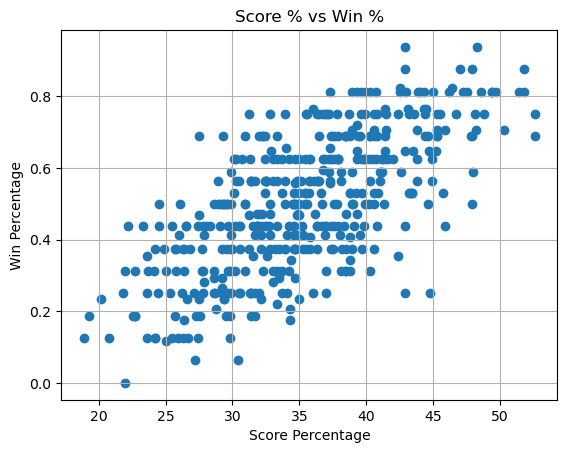

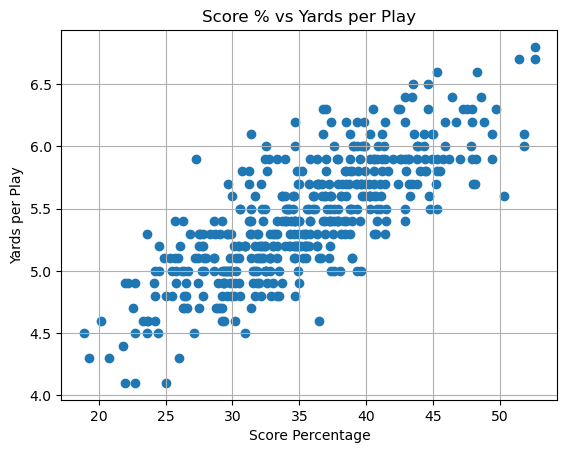

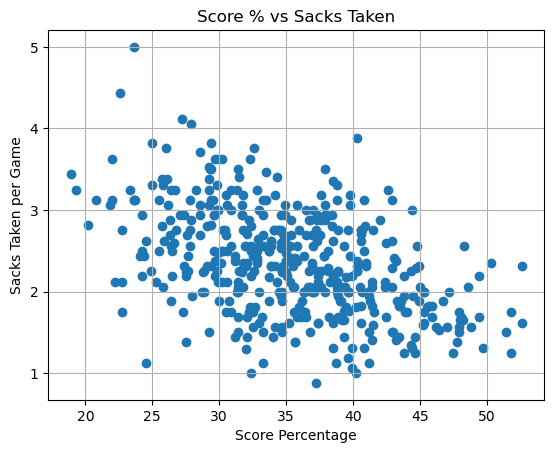

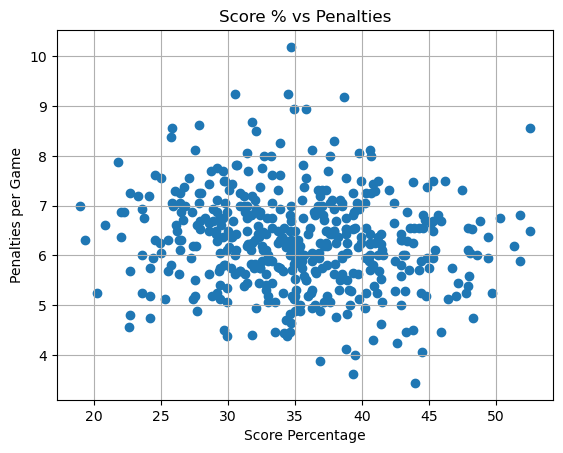

In [57]:
# 1. Score % vs Win %
plt.scatter(final_df["Score_pct"], final_df["Win_loss_perc"])
plt.xlabel("Score Percentage")
plt.ylabel("Win Percentage")
plt.title("Score % vs Win %")
plt.grid(True)
plt.show()

# 2. Score % vs Yards per Play
plt.scatter(final_df["Score_pct"], final_df["Yds_per_play_offense"])
plt.xlabel("Score Percentage")
plt.ylabel("Yards per Play")
plt.title("Score % vs Yards per Play")
plt.grid(True)
plt.show()

# 3. Score % vs Sacks Taken
plt.scatter(final_df["Score_pct"], final_df["Sacks_taken_per_game"])
plt.xlabel("Score Percentage")
plt.ylabel("Sacks Taken per Game")
plt.title("Score % vs Sacks Taken")
plt.grid(True)
plt.show()

# 4. Score % vs Penalties
plt.scatter(final_df["Score_pct"], final_df["Penalties_per_game"])
plt.xlabel("Score Percentage")
plt.ylabel("Penalties per Game")
plt.title("Score % vs Penalties")
plt.grid(True)
plt.show()

# Hypothesis Test

In [59]:
# Define metrics to test
metrics = ["Yds_per_play_offense",  "Score_pct",  "Sacks_taken_per_game", "Penalties_per_game",  "Win_loss_perc"]
top_teams = final_df.sort_values("Score_pct", ascending=False).head(int(0.25 * len(final_df)))
bottom_teams = final_df.sort_values("Score_pct", ascending=True).head(int(0.25 * len(final_df)))

# Run independent t-tests for each metric
t_test_results = []

for metric in metrics:
    top_values = top_teams[metric]
    bottom_values = bottom_teams[metric]
    t_stat, p_value = ttest_ind(top_values, bottom_values, equal_var=False)
    decision = "Reject null hypothesis" if p_value < 0.05 else "Fail to reject null hypothesis"
    t_test_results.append({
        "Metric": metric,
        "t-stat": round(t_stat, 3),
        "p-value": round(p_value, 4),
        "Decision": decision
    })

# Convert to DataFrame
t_test_df = pd.DataFrame(t_test_results)

# Display the summary table
t_test_df

,Metric,t-stat,p-value,Decision
0,Yds_per_play_offense,22.901,0.0000,Reject null hypothesis
1,Score_pct,41.574,0.0000,Reject null hypothesis
2,Sacks_taken_per_game,-10.317,0.0000,Reject null hypothesis
3,Penalties_per_game,-2.747,0.0065,Reject null hypothesis
4,Win_loss_perc,17.698,0.0000,Reject null hypothesis


###  Top 25% vs Bottom 25% Scoring Teams — Summary Statistics

In [63]:
top_summary = top_teams[[ "Yds_per_play_offense", "Score_pct", "Sacks_taken_per_game", "Penalties_per_game", "Win_loss_perc" ]].mean()
bottom_summary = bottom_teams[[ "Yds_per_play_offense", "Score_pct", "Sacks_taken_per_game", "Penalties_per_game", "Win_loss_perc" ]].mean()

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    "Top 25%": top_summary,
    "Bottom 25%": bottom_summary
})

# Display it
comparison_df

,Top 25%,Bottom 25%
Yds_per_play_offense,5.919643,4.934821
Score_pct,43.856250,27.014286
Sacks_taken_per_game,1.988839,2.802946
Penalties_per_game,6.130000,6.469196
Win_loss_perc,0.668500,0.329848


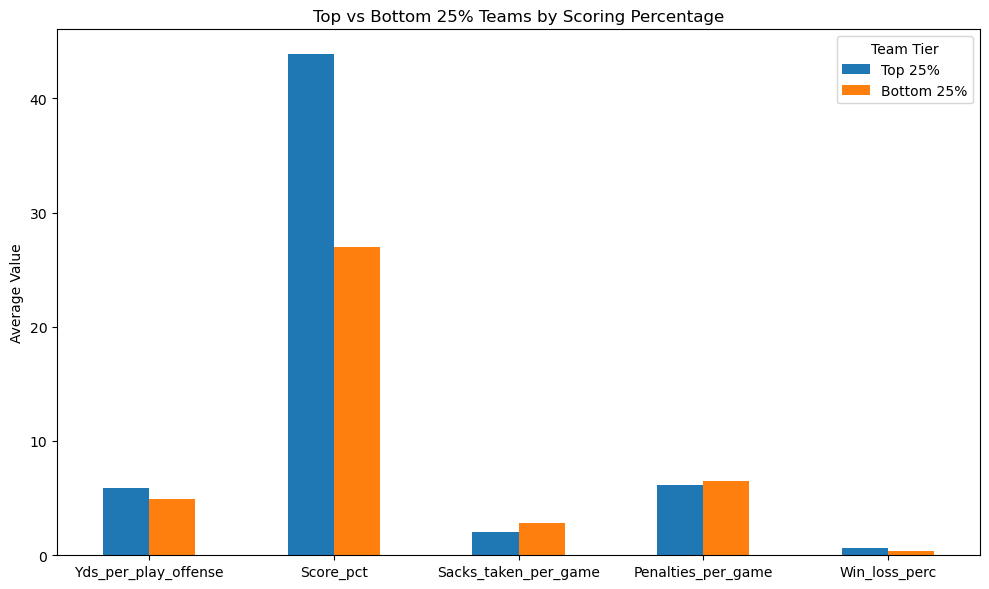

In [65]:
# Plot grouped bar chart
comparison_df.plot(kind="bar", figsize=(10, 6))
plt.title("Top vs Bottom 25% Teams by Scoring Percentage")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title="Team Tier")
plt.show()

# Question 3

In [68]:
final_df["Turnovers_per_game"].describe()

count    448.000000
mean       1.435312
std        0.386983
min        0.500000
25%        1.120000
50%        1.380000
75%        1.690000
max        2.750000
Name: Turnovers_per_game, dtype: float64

In [70]:
final_df["Penalties_per_game"].describe()

count    448.000000
mean       6.294978
std        0.981143
min        3.440000
25%        5.690000
50%        6.300000
75%        6.880000
max       10.190000
Name: Penalties_per_game, dtype: float64

In [72]:
final_df['Win_loss_perc'].describe()

count    448.000000
mean       0.500252
std        0.189040
min        0.000000
25%        0.375000
50%        0.500000
75%        0.625000
max        0.938000
Name: Win_loss_perc, dtype: float64

# Bivariate

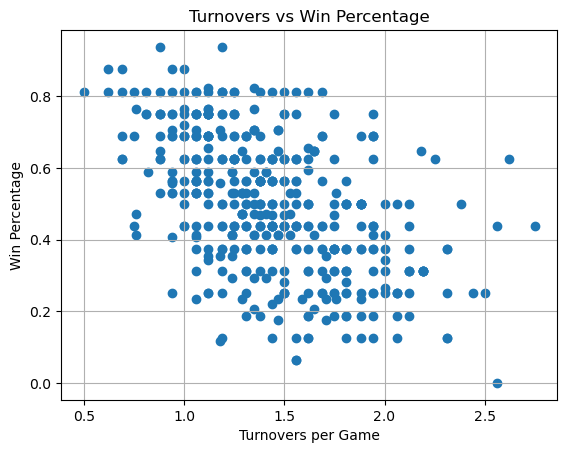

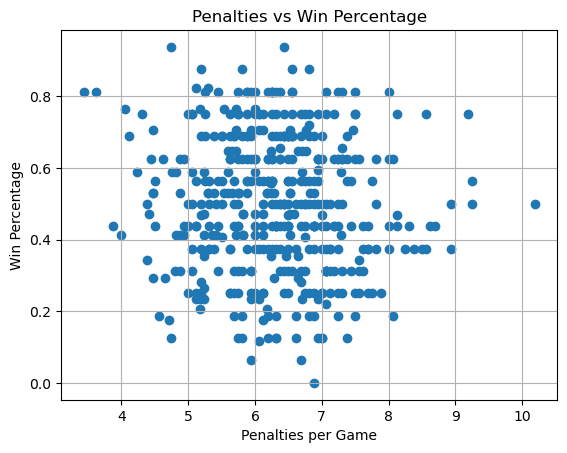

In [75]:
# Turnovers vs Win %
plt.scatter(final_df["Turnovers_per_game"], final_df["Win_loss_perc"])
plt.xlabel("Turnovers per Game")
plt.ylabel("Win Percentage")
plt.title("Turnovers vs Win Percentage")
plt.grid(True)
plt.show()

# Penalties vs Win %
plt.scatter(final_df["Penalties_per_game"], final_df["Win_loss_perc"])
plt.xlabel("Penalties per Game")
plt.ylabel("Win Percentage")
plt.title("Penalties vs Win Percentage")
plt.grid(True)
plt.show()

# Hypothesis Test

In [78]:
metrics = ["Turnovers_per_game", "Penalties_per_game"]
results = []

alpha = 0.05  # significance level

# Run Pearson correlation test for each
for metric in metrics:
    correlation, p_value = pearsonr(final_df[metric], final_df["Win_loss_perc"])
    decision = "Reject null hypothesis " if p_value < alpha else "Fail to reject null hypothesis "
    results.append({
        "Metric": metric,
        "Correlation": round(correlation, 3),
        "P-Value": round(p_value, 4),
        "Decision": decision
    })

# Convert to DataFrame
correlation_df = pd.DataFrame(results)
correlation_df

,Metric,Correlation,P-Value,Decision
0,Turnovers_per_game,-0.506,0.0000,Reject null hypothesis
1,Penalties_per_game,-0.080,0.0894,Fail to reject null hypothesis


# Model Comparison

In [81]:
# Define features and target
X = final_df[["Turnovers_per_game", "Penalties_per_game"]]
y = final_df["Win_loss_perc"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
lin_r2 = r2_score(y_test, y_pred_lin)
lin_mse = mean_squared_error(y_test, y_pred_lin)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

In [83]:
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R Squared': [lin_r2, ridge_r2, lasso_r2],
    'MSE': [lin_mse, ridge_mse, lasso_mse]
})

# Display table sorted by R Squared Score (descending)
print(model_results.sort_values(by='R Squared', ascending=False))

               Model  R Squared       MSE
0  Linear Regression   0.309317  0.024933
1   Ridge Regression   0.308140  0.024975
2   Lasso Regression  -0.004384  0.036257


# Question 4

In [90]:
results = []
team_yearly = final_df[["Team", "Year", "Win_loss_perc"]].sort_values(["Team", "Year"])
for team in team_yearly["Team"].unique():
    team_data = team_yearly[team_yearly["Team"] == team].sort_values("Year")
    
    # Set year as index and keep only the win percentage
    df_win = team_data.set_index("Year")[["Win_loss_perc"]]
    df_win.columns = ["Win_perc"]
    
    # Split into train/test last 2 years for testing
    train = df_win.iloc[:-2]
    test = df_win.iloc[-2:]
    train.index.name = 'Year'
    test.index.name = 'Year'
    
    model = ExponentialSmoothing(train["Win_perc"], trend='add', seasonal=None).fit()
    forecast = model.forecast(2)
   
    for year, actual, pred in zip(test.index, test["Win_perc"], forecast):
        results.append([team, year, actual, round(pred, 3)])

C:\Users\dakot\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dakot\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dakot\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\dakot\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dakot\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWar

In [92]:
# Create DataFrame
forecast_df = pd.DataFrame(results, columns=["Team", "Year", "Actual", "Forecast"]).sort_values(["Year","Team"])
forecast_df

,Team,Year,Actual,Forecast
0,49ers,2022,0.765,0.409
2,Bears,2022,0.176,0.388
4,Bengals,2022,0.750,0.368
6,Bills,2022,0.813,0.719
8,Broncos,2022,0.294,0.383
...,...,...,...,...
55,Seahawks,2023,0.529,0.648
57,Steelers,2023,0.588,0.612
59,Texans,2023,0.588,0.365
61,Titans,2023,0.353,0.696
